In [89]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import netCDF4
import datetime as dt
from datetime import datetime, timedelta
import numpy.ma as ma
import numpy as np
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import LinearNDInterpolator
import pandas as pd
import xarray as xr

filename_seabird = 'F:/data/cruise_data/seabird/sitelist_lats_longs.xlsx'
filename_sst = "F:/data/sst/hadisst/HadISST_sst.nc"
filename_ice = "F:/data/sst/hadisst/HadISST_ice.nc"
filename_sst_cvs = 'F:/data/cruise_data/seabird/sitelist_sst_timeseries.xlsx'
filename_sst_cvs2 = 'F:/data/cruise_data/seabird/sitelist_sst_anomalies_timeseries.xlsx'
filename_sst_cvs3 = 'F:/data/cruise_data/seabird/sitelist_sst_anomalies_monthly_climatology.xlsx'
filename_sst_cvs4 = 'F:/data/cruise_data/seabird/sitelist_sst_anomalies_smoothed_timeseries.xlsx'
filename_sst_time = 'F:/data/cruise_data/seabird/sitelist_sst_time.xlsx'
filename_sst_time2 = 'F:/data/cruise_data/seabird/sitelist_sst_time_ymd.xlsx'


In [2]:
#read seabird excel data
df = pd.read_excel(filename_seabird, sheet_name='data')
df

,site,site_num,latitude,longitude
0,Admirality,31,-62.177800,-58.444700
1,Aiktak,1,54.188600,-164.840000
2,Alcatraz,2,37.826670,-122.423330
3,Anacapa,3,34.003889,-119.394722
4,Bird,4,-54.005556,-38.050000
5,Buldir,5,52.358056,175.924722
6,Cape Lisburne,6,68.881110,-166.210000
7,Cape Peirce,7,58.552780,-161.769000
8,Chowiet,8,56.034230,-156.701160
9,Dassen,32,-33.423402,18.087127


In [3]:
#read sst and ice data
#6/15/2018 the time in the sst data is bad.  all set to flag.  time in ice okay so using that.  ice data only used for time.
f = netCDF4.Dataset(filename_sst, mode="r")
f2 = netCDF4.Dataset(filename_ice, mode="r")
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Title: Monthly version of HadISST sea surface temperature component
    description: HadISST 1.1 monthly average sea surface temperature
    institution: Met Office Hadley Centre
    source: HadISST
    reference: Rayner, N. A., Parker, D. E., Horton, E. B., Folland, C. K., Alexander, L. V., Rowell, D. P., Kent, E. C., Kaplan, A.  Global analyses of sea surface temperature, sea ice, and night marine air temperature since the late nineteenth century J. Geophys. Res.Vol. 108, No. D14, 4407 10.1029/2002JD002670
    Conventions: CF-1.0
    history: 8/5/2018 converted to netcdf from pp format
    supplementary_information: Updates and supplementary information will be available from http://www.metoffice.gov.uk/hadobs/hadisst
    comment: Data restrictions: for academic research use only. Data are Crown copyright see (http://www.opsi.gov.uk/advice/crown-copyright/copyright-guidance/index.htm)

In [4]:
#interpolate SST to 33 points using 'linear'
lon_sst = f.variables['longitude'][:]
lat_sst = f.variables['latitude'][:]
dys_since1870 = f2.variables['time'][:]
tem_sst = f.variables['sst'][:]
print(type(tem_sst))
date_1870 = dt.datetime(1870,1,1,0,0,0) # start date is1/1/1970
tdim=tem_sst.shape[0]
tem=dys_since1870.tolist()
time_sst = np.array([dt.datetime(1870,1,1) + dt.timedelta(days=tem[i]) for i in range(tdim)])
lat_sst2=np.flip(lat_sst,0)
sst= ma.masked_values (tem_sst, -1000.)
sst2=np.flip(sst,1)

<class 'numpy.ma.core.MaskedArray'>


In [566]:
tem=sst[-15:-14,13:15,20:22]
print('tem:',tem,type(tem))
m=ma.getmaskarray(tem)
#print(df.site_num[6],lon_sst[13:15],lat_sst[20:22])
print(tem.view)
print(m)
mx = ma.masked_values (tem, -1000.)
ma.masked_less(mx, -10.)
m=ma.getmaskarray(mx)
print(mx)
print(m)
print(mx.mean())

tem: [[[-- --]
  [-1.7999999523162842 -1.7999999523162842]]] <class 'numpy.ma.core.MaskedArray'>
<bound method MaskedArray.view of masked_array(
  data=[[[--, --],
         [-1.7999999523162842, -1.7999999523162842]]],
  mask=[[[ True,  True],
         [False, False]]],
  fill_value=-1000.0,
  dtype=float32)>
[[[ True  True]
  [False False]]]
[[[-- --]
  [-1.7999999523162842 -1.7999999523162842]]]
[[[ True  True]
  [False False]]]
-1.7999999523162842


In [567]:
#print(df.longitude[2],df.latitude[2])
#print(lon_sst[56:60],lat_sst[50:54])
#print(sst[0,50:54,56:60])
#plt.imshow(sst2[0,:,:],vmin=0,vmax=30)
coarseness = 2
temp = lon_sst.reshape((lon_sst.shape[0] // coarseness, coarseness))
coarse_lon = np.mean(temp, axis=(1), dtype=np.float64)
temp = lat_sst.reshape((lat_sst.shape[0] // coarseness, coarseness))
coarse_lat = np.mean(temp, axis=(1), dtype=np.float64)
coarse_sst=np.zeros((sst.shape[0],90,180))
for i in range(0,tdim):
    sst0=sst[i,:,:]
    temp = sst0.reshape((sst0.shape[0] // coarseness, coarseness, sst0.shape[1] // coarseness, coarseness))
    coarse_sst[i,:,:] = np.mean(temp, axis=(1,3), dtype=np.float64)
#print(coarse_lon[28:30],coarse_lat[25:27])
#print(coarse_sst[0,25:27,28:30])
coarse_lat2=np.flip(coarse_lat,0)
coarse_sst2=np.flip(coarse_sst,1)



In [568]:
x=dys_since1870.data
#y=lat_sst2
#z=lon_sst
#v=sst2
y=coarse_lat2
z=coarse_lon
v=coarse_sst2
my_interpolating_function = RegularGridInterpolator((x, y, z), v,method='linear')
#my_interpolating_function = LinearNDInterpolator((x, y, z), v)
sst_seabird=np.empty((1779,33))
for i in range(0,df.shape[0]):
    x=np.ones(tdim)*df.longitude[i]
    y=np.ones(tdim)*df.latitude[i]
    pts=np.array([dys_since1870,y,x]).T
    tem=my_interpolating_function(pts)
    sst_seabird[:,i]=tem

In [569]:
#print(df.site_num[6],lon_sst[13:15],lat_sst[20:22],sst[-15:-12,13:15,20:22],sst[0,0,0])

In [570]:
print(lat_sst2[90],lon_sst[180],sst2[1,90,180],type(sst2))
print(my_interpolating_function(np.array([30.0,0.0,0.0])))
print(type(sst_seabird))
dfsst = pd.DataFrame(sst_seabird)
writer = pd.ExcelWriter(filename_sst_cvs)
dfsst.to_excel(writer,'HADISST')
writer.save()

0.5 0.5 28.283539 <class 'numpy.ma.core.MaskedArray'>
[27.83897524]
<class 'numpy.ndarray'>


In [571]:
#put sst_seabird into a panda series with the time_sst datetime as the index
sv_anom=np.zeros((1779,33))
sv_clim=np.zeros((12,33))
for ilocation in range(0,33):
    cum_data   = pd.Series(sst_seabird[:,ilocation], index=time_sst)
    #print(cum_data)
    #sst_clim = cum_data.groupby(cum_data.index.month).mean()
    #sst_anom=cum_data.groupby(cum_data.index.month) - sst_clim
    #put panda series into xarray
    a = cum_data.to_xarray()
    #put xarray into a dataset
    ds = a.to_dataset(name="sst_seabird")
    #calculate climatology and anomalies
    climatology = ds.groupby('index.month').mean('index')
    anomalies = ds.groupby('index.month') - climatology
    #create a timeseries that just has the climatology mapped onto it
    sst_clim_ts=np.zeros(tdim)
    for i in range(0,tdim):
        sst_clim_ts[i]=climatology['sst_seabird'][int(time_sst[i].month)-1].data
    #plot figure, offset anomaly by adding in mean value so that it is onto of data
    plt.clf()
    plt.plot(time_sst,sst_seabird[:,ilocation])
    #plt.plot(time_sst,sst_seabird[:,ilocation].mean()+sst_clim_ts,'g')
    plt.plot(time_sst,sst_seabird[:,ilocation].mean()+anomalies['sst_seabird'],'r')
    plt.xlabel('Date')
    plt.ylabel('HadISST (C)')
    plt.xlim(datetime(1962,1,1),datetime(2017,1,1))
    #plt.show()
    filename_png='F:/data/cruise_data/seabird/site_num'+str(df.site_num[ilocation])+'_'+str(df.site[ilocation])+'.png'
    plt.savefig(filename_png, transparent=False, format='png')
    plt.close()
    sv=anomalies['sst_seabird'].values
    sv_anom[:,ilocation]=sv
    sv2=climatology['sst_seabird'].values
    sv_clim[:,ilocation]=sv2


In [572]:
anomalies

<xarray.Dataset>
Dimensions:      (index: 1779)
Coordinates:
  * index        (index) datetime64[ns] 1870-01-16T11:59:59.505615 ...
    month        (index) int64 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 ...
Data variables:
    sst_seabird  (index) float64 0.08201 0.1112 0.2634 0.174 0.184 0.2482 ...

In [573]:
climatology

<xarray.Dataset>
Dimensions:      (month: 12)
Coordinates:
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst_seabird  (month) float64 27.76 28.44 28.93 28.41 27.11 25.36 24.44 ...

In [574]:
dfsst = pd.DataFrame(sv_anom)
writer = pd.ExcelWriter(filename_sst_cvs2)
dfsst.to_excel(writer,'HADISST Anomalies')
writer.save()
dfsst = pd.DataFrame(sv_clim)
writer = pd.ExcelWriter(filename_sst_cvs3)
dfsst.to_excel(writer,'HADISST Monthly Climatology')
writer.save()

In [575]:
import numpy

def smooth(x,window_len=13,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y



(1829,)


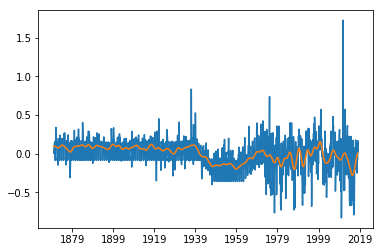

In [576]:
t=smooth(sv_anom[:,0],51,'hanning')
print(t.shape)
plt.clf()
plt.plot(time_sst,sv_anom[:,0])
plt.plot(time_sst,t[25:1804])


In [577]:
sv_anom=np.zeros((1779,33))
sv_anom_smooth=np.zeros((1779,33))
sv_clim=np.zeros((12,33))
for ilocation in range(0,33):
    cum_data   = pd.Series(sst_seabird[:,ilocation], index=time_sst)
    #print(cum_data)
    #sst_clim = cum_data.groupby(cum_data.index.month).mean()
    #sst_anom=cum_data.groupby(cum_data.index.month) - sst_clim
    #put panda series into xarray
    a = cum_data.to_xarray()
    #put xarray into a dataset
    ds = a.to_dataset(name="sst_seabird")
    #calculate climatology and anomalies
    climatology = ds.groupby('index.month').mean('index')
    anomalies = ds.groupby('index.month') - climatology
    #create a timeseries that just has the climatology mapped onto it
    sst_clim_ts=np.zeros(tdim)
    for i in range(0,tdim):
        sst_clim_ts[i]=climatology['sst_seabird'][int(time_sst[i].month)-1].data
    #plot figure, offset anomaly by adding in mean value so that it is onto of data
    sv=anomalies['sst_seabird'].values
    sv_anom[:,ilocation]=sv
    sv2=climatology['sst_seabird'].values
    sv_clim[:,ilocation]=sv2
    t=smooth(sv_anom[:,ilocation],49,'hanning')
    sv_anom_smooth[:,ilocation]=t[24:1803]
    plt.clf()
    plt.plot(time_sst,sst_seabird[:,ilocation])
    #plt.plot(time_sst,sst_seabird[:,ilocation].mean()+sst_clim_ts,'g')
    plt.plot(time_sst,sst_seabird[:,ilocation].mean()+anomalies['sst_seabird'],'r')
    plt.plot(time_sst,sst_seabird[:,ilocation].mean()+t[24:1803],'g')
    plt.xlabel('Date')
    plt.ylabel('HadISST (C)')
    plt.xlim(datetime(1962,1,1),datetime(2017,1,1))
    #plt.show()
    filename_png='F:/data/cruise_data/seabird/site_num'+str(df.site_num[ilocation])+'_'+str(df.site[ilocation])+'.png'
    plt.savefig(filename_png, transparent=False, format='png')
    plt.close()


In [583]:
dfsst = pd.DataFrame(sv_anom_smooth)
writer = pd.ExcelWriter(filename_sst_cvs4)
dfsst.to_excel(writer,'HADISST Anomaly Smoothed')
writer.save()
dfsst = pd.DataFrame(dys_since1870)
writer = pd.ExcelWriter(filename_sst_time)
dfsst.to_excel(writer,'HADISST time')
writer.save()

1779


SyntaxError: invalid syntax (<ipython-input-18-f04ed919426e>, line 1)

<xarray.DataArray 'time' ()>
array('1870-01-16T11:59:59.505615234', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1870-01-16T11:59:59.505615234
Attributes:
    long_name:      Time
    standard_name:  time

In [80]:
tstr=np.zeros([1779,3])
for i in range(0,1779):
    tstr[i,0]=time_sst[i].year
    tstr[i,1]=time_sst[i].month
    tstr[i,2]=time_sst[i].day

In [85]:
tstr[0,0]

1870.0

In [86]:
df_time = pd.DataFrame({'year': tstr[:,0],
                       'month': tstr[:,1],
                       'day': tstr[:,2]})

In [90]:
writer = pd.ExcelWriter(filename_sst_time2)
df_time.to_excel(writer,'HADISST time')
writer.save()